<a href="https://colab.research.google.com/github/jpedrou/PlaygroundSeriesSeason3Episode2/blob/main/Playground_Series_Season_3%2C_Episode_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with a Software Defects Dataset
- Goal: Predict defects in C programs given various attributes about the code.
---

## Libraries
---

In [ ]:
!pip install catboost

In [ ]:
# Main
import pandas as pd
pd.set_option('Display.max_columns', None)
import numpy as np

# sklearn package
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## Load Datasets
---

In [ ]:
df = pd.read_csv('train.csv', index_col= 'id')
df_test = pd.read_csv('test.csv', index_col = 'id')

In [ ]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [ ]:
df_test.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


## Exploratory data analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [ ]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67842 entries, 101763 to 169604
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                67842 non-null  float64
 1   v(g)               67842 non-null  float64
 2   ev(g)              67842 non-null  float64
 3   iv(g)              67842 non-null  float64
 4   n                  67842 non-null  float64
 5   v                  67842 non-null  float64
 6   l                  67842 non-null  float64
 7   d                  67842 non-null  float64
 8   i                  67842 non-null  float64
 9   e                  67842 non-null  float64
 10  b                  67842 non-null  float64
 11  t                  67842 non-null  float64
 12  lOCode             67842 non-null  int64  
 13  lOComment          67842 non-null  int64  
 14  lOBlank            67842 non-null  int64  
 15  locCodeAndComment  67842 non-null  int64  
 16  uniq_Op         

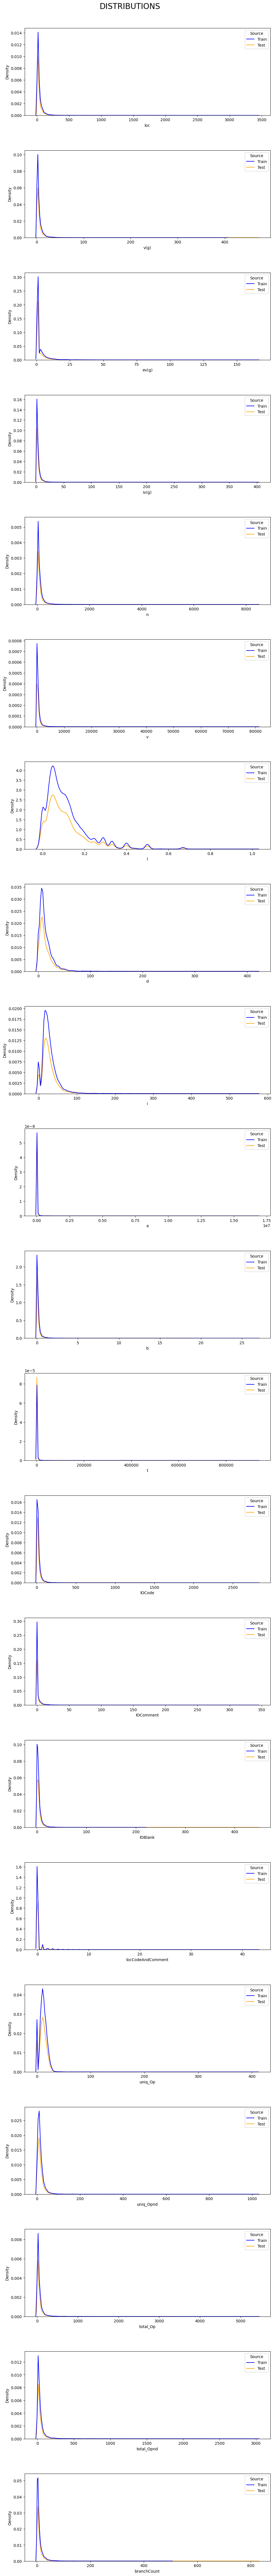

In [ ]:
df_num = df.drop(columns = 'defects').select_dtypes(include = ['int64', 'float64']).columns
df_plots = pd.concat([df[df_num].assign(Source = 'Train'), df_test[df_num].assign(Source = 'Test')], ignore_index = True)

fig, axes = plt.subplots(len(df_num), 1, figsize = (10, 4.3 * len(df_num)), gridspec_kw={'hspace': .4})

for i, col in enumerate(df_num):
    ax = axes[i]
    sns.kdeplot(data = df_plots[[col, 'Source']], palette = ['blue', 'orange'], x = col, hue = 'Source', warn_singular = False, ax = ax)

plt.suptitle('DISTRIBUTIONS', fontsize = 20, y = 1.01)
plt.subplots_adjust(top=1, right = 1, bottom = 0)
plt.show()

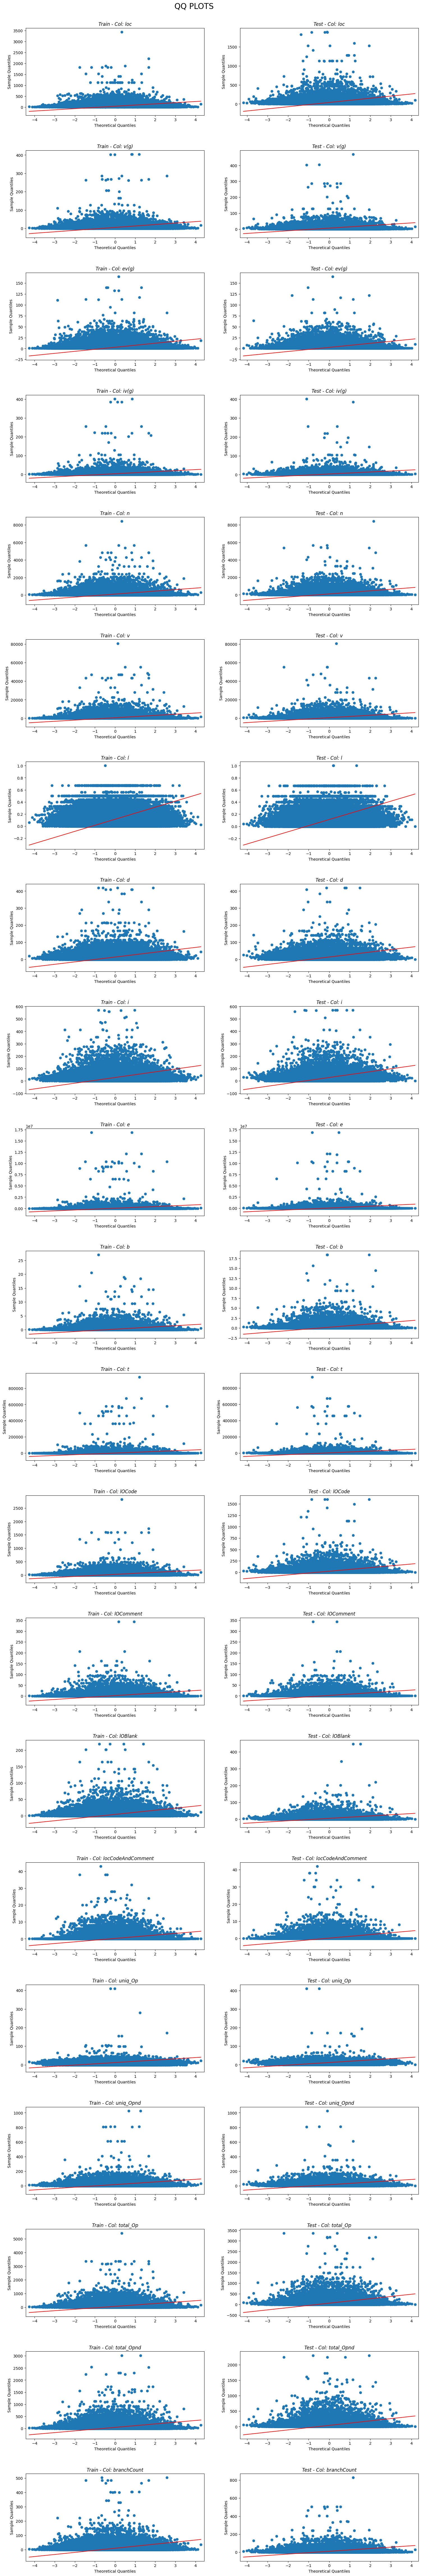

In [ ]:
fig, axes = plt.subplots(len(df_num), 2, figsize = (16, 4.3 * len(df_num)), gridspec_kw={'hspace': .4, 'wspace': .2})

for i, col in enumerate(df_num):
    ax = axes[i, 0]
    qqplot(data = df_plots.loc[df_plots.Source == 'Train', [col]], line = 's', ax = ax)
    ax.set_title(f'Train - Col: {col}', fontsize = 12, fontstyle = 'italic')

    ax = axes[i, 1]
    qqplot(data = df_plots.loc[df_plots.Source == 'Test',  [col]], line = 's', ax = ax)
    ax.set_title(f'Test - Col: {col}', fontsize = 12, fontstyle = 'italic')

plt.suptitle('QQ PLOTS', fontsize = 20, y = 1.01)
plt.subplots_adjust(top=1, right = 1, bottom = 0)
plt.show()

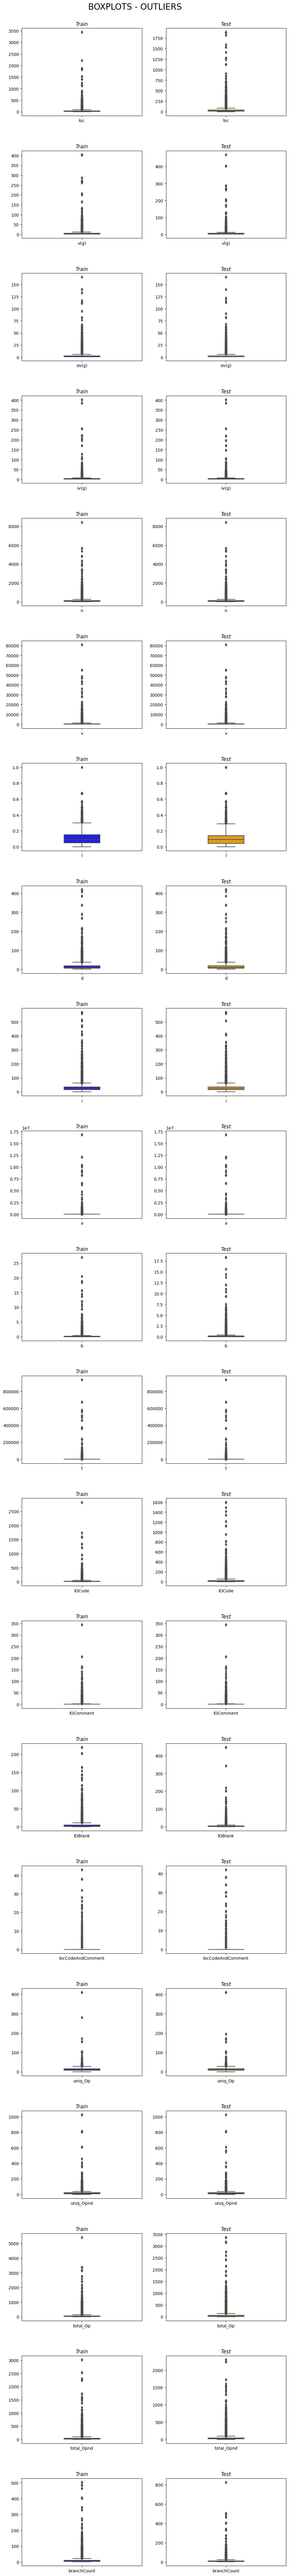

In [ ]:
fig, axes = plt.subplots(len(df_num), 2, figsize = (10, 4 * len(df_num)), gridspec_kw={'hspace': .4, 'wspace': .2})

for i, col in enumerate(df_num):
    ax = axes[i, 0]
    sns.boxplot(data = df_plots.loc[df_plots.Source == 'Train', [col]], width=0.3, color = 'blue', ax = ax)
    ax.set_title('Train', fontsize = 12, fontstyle = 'italic')

    ax = axes[i, 1]
    sns.boxplot(data = df_plots.loc[df_plots.Source == 'Test',  [col]], width = 0.3, color = 'orange', ax = ax)
    ax.set_title('Test', fontsize = 12, fontstyle = 'italic')

plt.suptitle('BOXPLOTS - OUTLIERS', fontsize = 20, y = 1.01)
plt.subplots_adjust(top=1, right = 1, bottom = 0)
plt.show()

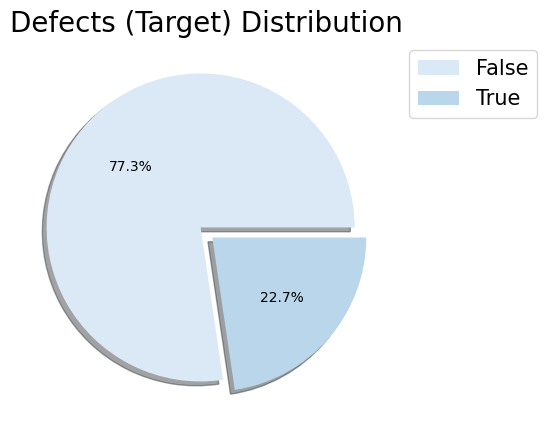

In [ ]:
sns.set_palette('Blues')

count = df['defects'].value_counts()

plt.figure(figsize = (10, 5))
plt.pie(count, shadow = True, explode = [0.05] * len(count), autopct = '%.1f%%')
plt.title('Defects (Target) Distribution', fontsize = 20)
plt.legend(count.index, fontsize = 15, bbox_to_anchor = (1,1))
plt.show()

In [ ]:
df.corr() * 100

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,100.000000,76.150909,54.456895,69.632656,75.960464,75.806944,-38.801807,59.947418,48.642688,50.128108,73.992611,51.222786,80.346008,52.802888,67.075053,24.624425,36.706828,63.758174,76.461235,76.166182,76.275490,34.264153
v(g),76.150909,100.000000,72.924938,79.055293,63.104136,61.826676,-38.726982,57.430514,30.453072,43.018397,61.195393,47.207973,64.183516,37.952010,46.175918,20.832416,38.991745,53.235811,63.912546,60.645298,96.670217,30.118674
ev(g),54.456895,72.924938,100.000000,54.525492,39.050440,36.769713,-32.548807,35.773452,16.059416,27.517938,36.088867,28.039126,38.254150,29.268867,28.229300,16.456331,20.046013,27.909995,39.496300,37.286664,77.475162,25.992806
iv(g),69.632656,79.055293,54.525492,100.000000,58.971789,58.513449,-29.163084,48.711162,31.997126,39.429076,56.396940,41.464026,63.689521,33.772792,42.603006,17.854563,37.886928,55.063299,59.159655,56.709750,74.787031,24.561805
n,75.960464,63.104136,39.050440,58.971789,100.000000,92.838951,-30.034986,80.829079,72.540836,56.954417,91.825379,60.220246,91.176101,56.637366,77.534511,26.291579,61.802147,81.899418,96.337331,95.308039,62.600918,25.807975
v,75.806944,61.826676,36.769713,58.513449,92.838951,100.000000,-25.408747,74.812149,67.338561,58.233215,93.526335,59.043096,89.925767,53.198543,73.527818,24.205745,54.428252,79.896378,93.644566,94.218939,60.867791,23.117863
l,-38.801807,-38.726982,-32.548807,-29.163084,-30.034986,-25.408747,100.000000,-42.630895,-16.229956,-9.176399,-25.424477,-9.700036,-28.971334,-18.798157,-28.883836,-12.547955,-39.944042,-28.364425,-29.446874,-29.055857,-41.618520,-25.323730
d,59.947418,57.430514,35.773452,48.711162,80.829079,74.812149,-42.630895,100.000000,51.540163,47.127570,75.512970,49.397621,77.885643,48.661947,67.629670,26.818392,78.278061,69.065192,80.827480,78.473832,57.515452,24.193606
i,48.642688,30.453072,16.059416,31.997126,72.540836,67.338561,-16.229956,51.540163,100.000000,28.614866,68.146871,30.093848,67.709304,43.582809,65.434930,21.415085,52.764048,80.333011,70.205822,74.020099,31.393461,20.857742
e,50.128108,43.018397,27.517938,39.429076,56.954417,58.233215,-9.176399,47.127570,28.614866,100.000000,61.486810,79.826586,58.008881,32.899254,43.627597,12.460401,27.582379,41.484570,57.901811,56.698631,42.710992,9.536591


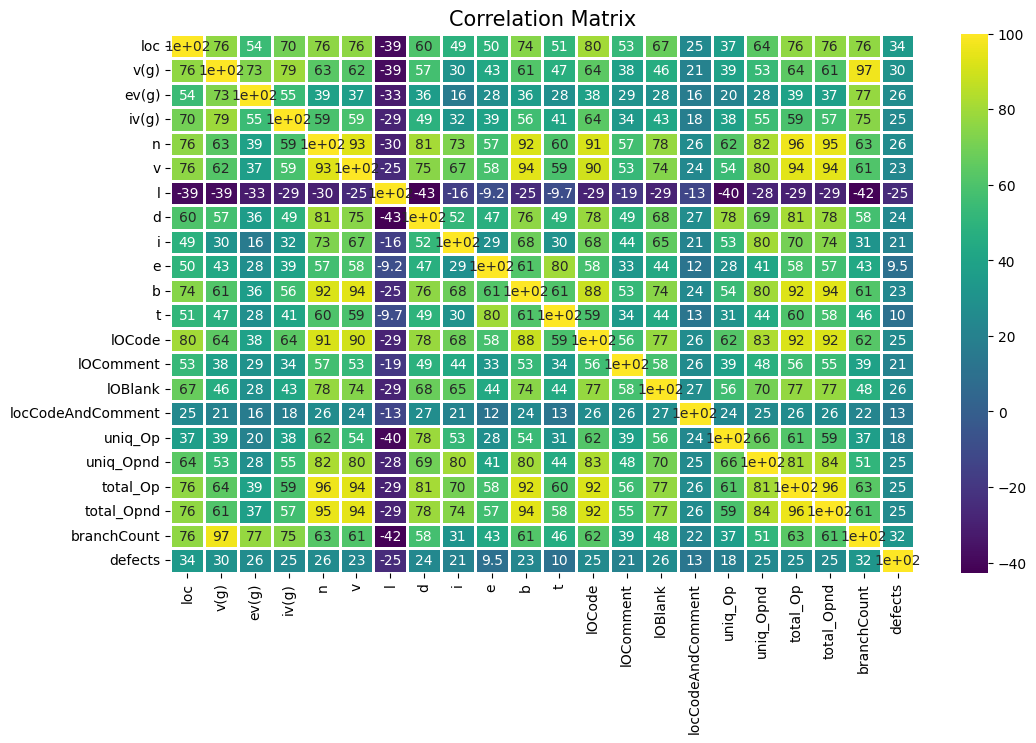

In [ ]:
plt.figure(figsize = (12, 7))
sns.heatmap(data = df.corr() * 100, annot = True, cmap = 'viridis', linewidths=1, linecolor = 'white', square = False)
plt.title('Correlation Matrix', fontsize = 15)
plt.show()

## Data Split
---

In [ ]:
X = df.drop(columns = 'defects', axis = 1)
X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [ ]:
y = df['defects'].map({True: 1, False: 0})
y

id
0         0
1         0
2         0
3         1
4         0
         ..
101758    0
101759    0
101760    0
101761    0
101762    0
Name: defects, Length: 101763, dtype: int64

# Preprocessing
---

In [ ]:
# qt = QuantileTransformer(output_distribution='normal')
scaler = StandardScaler()

In [ ]:
# X_transformed = qt.fit_transform(X)
X_transformed = scaler.fit_transform(X)
X_transformed = pd.DataFrame(data = X_transformed, columns = X.columns, index = X.index)

In [ ]:
X_transformed.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
0,-0.281083,-0.315497,-0.398386,-0.270814,-0.214179,-0.204323,-0.515843,0.416261,-0.582895,-0.080835,-0.211368,-0.085032,-0.150553,-0.131124,-0.466893,-0.19682,0.608024,-0.365180,-0.187762,-0.240609,-0.335784
1,-0.427603,-0.442066,-0.398386,-0.270814,-0.377782,-0.304545,0.283395,-0.473180,-0.282763,-0.104512,-0.306190,-0.110448,-0.306233,-0.300547,-0.466893,-0.19682,-0.132770,-0.254463,-0.379082,-0.352197,-0.474550
2,-0.482548,-0.442066,-0.398386,-0.270814,-0.301824,-0.268048,-0.016319,-0.398824,-0.210574,-0.100223,-0.258779,-0.105844,-0.384072,-0.300547,-0.466893,-0.19682,0.015389,-0.254463,-0.283422,-0.310351,-0.474550
3,-0.537492,-0.568635,-0.398386,-0.451499,-0.430368,-0.349603,0.782918,-0.597106,-0.424954,-0.106942,-0.353601,-0.113057,-0.487858,-0.300547,-0.310211,-0.19682,-0.577246,-0.531254,-0.398214,-0.449837,-0.613317
4,-0.482548,-0.442066,-0.398386,-0.270814,-0.465426,-0.375627,0.683014,-0.570197,-0.662084,-0.107508,-0.377307,-0.113665,-0.410019,-0.300547,-0.310211,-0.19682,-0.725405,-0.531254,-0.455609,-0.407991,-0.474550


## Features Selection
---

In [ ]:
model_for_features_selection = GradientBoostingClassifier(random_state = 42)

In [ ]:
model_for_features_selection.fit(X_transformed, y)

GradientBoostingClassifier(random_state=42)

In [ ]:
importances = model_for_features_selection.feature_importances_

In [ ]:
features_importance = pd.DataFrame({'Features': X_transformed.columns, 'Importance': importances})
features_importance = features_importance.sort_values('Importance', ascending = False)

features_importance

,Features,Importance
0,loc,0.898522
14,lOBlank,0.020317
5,v,0.016342
17,uniq_Opnd,0.009687
16,uniq_Op,0.009259
7,d,0.006760
3,iv(g),0.006186
8,i,0.005458
18,total_Op,0.003936
6,l,0.003813


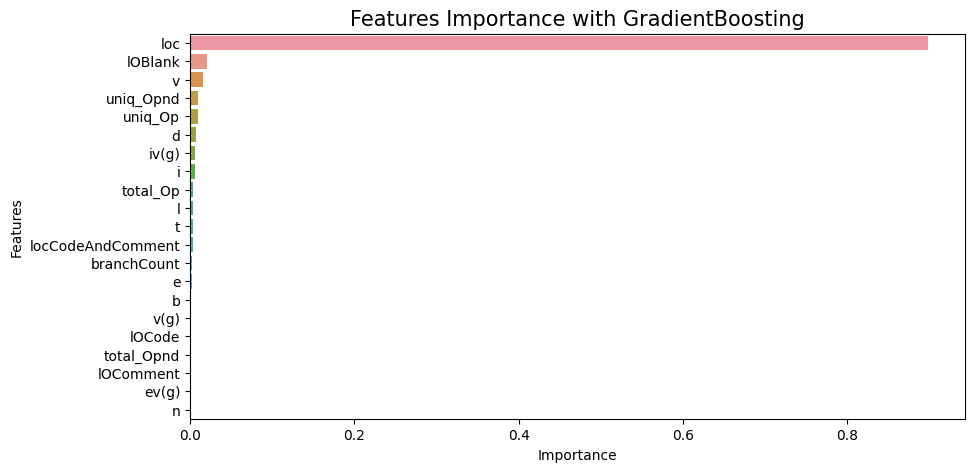

In [ ]:
sns.set_palette('pastel')
plt.figure(figsize = (10,5))
sns.barplot(data = features_importance, x = 'Importance', y = 'Features')
plt.title('Features Importance with GradientBoosting', fontsize = 15)
plt.show()

In [ ]:
X_transformed = X_transformed.drop(columns ='n', axis = 1)
X_transformed

,loc,v(g),ev(g),iv(g),v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,
0,-0.281083,-0.315497,-0.398386,-0.270814,-0.204323,-0.515843,0.416261,-0.582895,-0.080835,-0.211368,-0.085032,-0.150553,-0.131124,-0.466893,-0.19682,0.608024,-0.365180,-0.187762,-0.240609,-0.335784
1,-0.427603,-0.442066,-0.398386,-0.270814,-0.304545,0.283395,-0.473180,-0.282763,-0.104512,-0.306190,-0.110448,-0.306233,-0.300547,-0.466893,-0.19682,-0.132770,-0.254463,-0.379082,-0.352197,-0.474550
2,-0.482548,-0.442066,-0.398386,-0.270814,-0.268048,-0.016319,-0.398824,-0.210574,-0.100223,-0.258779,-0.105844,-0.384072,-0.300547,-0.466893,-0.19682,0.015389,-0.254463,-0.283422,-0.310351,-0.474550
3,-0.537492,-0.568635,-0.398386,-0.451499,-0.349603,0.782918,-0.597106,-0.424954,-0.106942,-0.353601,-0.113057,-0.487858,-0.300547,-0.310211,-0.19682,-0.577246,-0.531254,-0.398214,-0.449837,-0.613317
4,-0.482548,-0.442066,-0.398386,-0.270814,-0.375627,0.683014,-0.570197,-0.662084,-0.107508,-0.377307,-0.113665,-0.410019,-0.300547,-0.310211,-0.19682,-0.725405,-0.531254,-0.455609,-0.407991,-0.474550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,-0.500863,-0.442066,-0.398386,-0.451499,-0.326807,0.383299,-0.501506,-0.391265,-0.105168,-0.329896,-0.111152,-0.410019,-0.300547,-0.466893,-0.19682,-0.132770,-0.420538,-0.398214,-0.380094,-0.474550
101759,-0.189508,-0.062359,0.249389,-0.451499,0.017036,-0.515843,0.305789,0.288625,-0.050298,0.025687,-0.052252,0.005126,-0.300547,-0.310211,-0.19682,0.904342,0.243760,0.089651,0.010466,-0.058251
101760,-0.207823,-0.568635,-0.398386,-0.451499,-0.140158,-0.715652,0.642162,-0.656834,-0.078501,-0.140252,-0.082525,-0.072714,-0.300547,0.003155,-0.19682,-0.280928,-0.420538,-0.063404,-0.156917,-0.613317


## Modeling
---

### Models Validation

In [ ]:
results_ct = []
results_lb = []
results_rf = []
results_hgb = []
results_xb = []

for i in range(30):
    X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size = 0.2, random_state = i)

#------------------- LGBM -------------------------------------------

    lb = LGBMClassifier(random_state = 0, verbose = 0, force_row_wise=True)

    lb.fit(X_train, y_train)
    predictions = lb.predict(X_val)
    results_lb.append(roc_auc_score(y_val, predictions))

#------------------- HistGradientBoosting -------------------------------------------
    hgb = HistGradientBoostingClassifier(random_state = 42)

    hgb.fit(X_train, y_train)
    predictions = hgb.predict(X_val)
    results_hgb.append(roc_auc_score(y_val, predictions))

#------------------- RandomForest -------------------------------------------
    rf = RandomForestClassifier(random_state = 42)

    rf.fit(X_train, y_train)
    predictions = rf.predict(X_val)
    results_rf.append(roc_auc_score(y_val, predictions))

#------------------- XGBOOST -------------------------------------------
    xb = XGBClassifier(random_state = 42)

    xb.fit(X_train, y_train)
    predictions = xb.predict(X_val)
    results_xb.append(roc_auc_score(y_val, predictions))

#------------------- CATBOOST -------------------------------------------
    ct = CatBoostClassifier(random_state = 42, verbose = False)

    ct.fit(X_train, y_train)
    predictions = ct.predict(X_val)
    results_ct.append(roc_auc_score(y_val, predictions))

    print(f'Round --> {i}')

Round --> 0
Round --> 1
Round --> 2
Round --> 3
Round --> 4
Round --> 5
Round --> 6
Round --> 7
Round --> 8
Round --> 9
Round --> 10
Round --> 11
Round --> 12
Round --> 13
Round --> 14
Round --> 15
Round --> 16
Round --> 17
Round --> 18
Round --> 19
Round --> 20
Round --> 21
Round --> 22
Round --> 23
Round --> 24
Round --> 25
Round --> 26
Round --> 27
Round --> 28
Round --> 29


In [ ]:
results = pd.DataFrame({'Catboost': results_ct,
                        'LGBM': results_lb,
                        'RandomForest': results_rf,
                        'HistGradient': results_hgb ,
                        'XGboost': results_xb})
results

,Catboost,LGBM,RandomForest,HistGradient,XGboost
0,0.664688,0.667007,0.655281,0.667914,0.662322
1,0.661923,0.663331,0.654549,0.664866,0.657755
2,0.662033,0.662037,0.656289,0.664277,0.659645
3,0.661799,0.662248,0.649996,0.662483,0.653639
4,0.666924,0.667401,0.658258,0.669976,0.662912
5,0.659242,0.661014,0.652604,0.661272,0.657305
6,0.664147,0.670812,0.657918,0.670636,0.665348
7,0.660671,0.660147,0.652197,0.662708,0.658308
8,0.658047,0.661772,0.651352,0.659175,0.654492
9,0.662657,0.664749,0.651932,0.664285,0.658651


### Models Evaluation

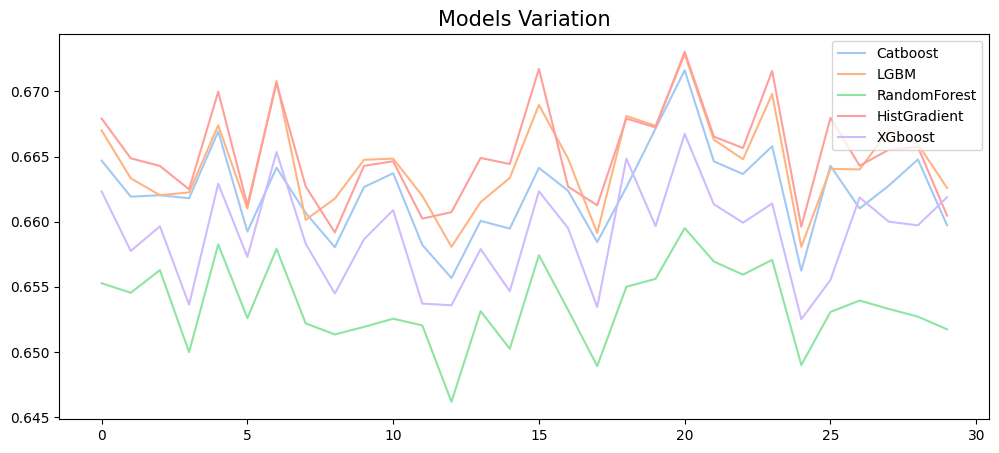

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(results)
plt.legend(results.columns, loc = 'upper right')
plt.title('Models Variation', fontsize = 15)
plt.show()

In [ ]:
models_stats = pd.DataFrame({'Models': results.columns, 'Mean': results.mean(), 'Variance': results.var(), 'Standard Deviation': results.std()})
models_stats

,Models,Mean,Variance,Standard Deviation
Catboost,Catboost,0.662284,0.000012,0.003424
LGBM,LGBM,0.664470,0.000013,0.003660
RandomForest,RandomForest,0.653602,0.000010,0.003092
HistGradient,HistGradient,0.665125,0.000014,0.003781
XGboost,XGboost,0.659062,0.000015,0.003816


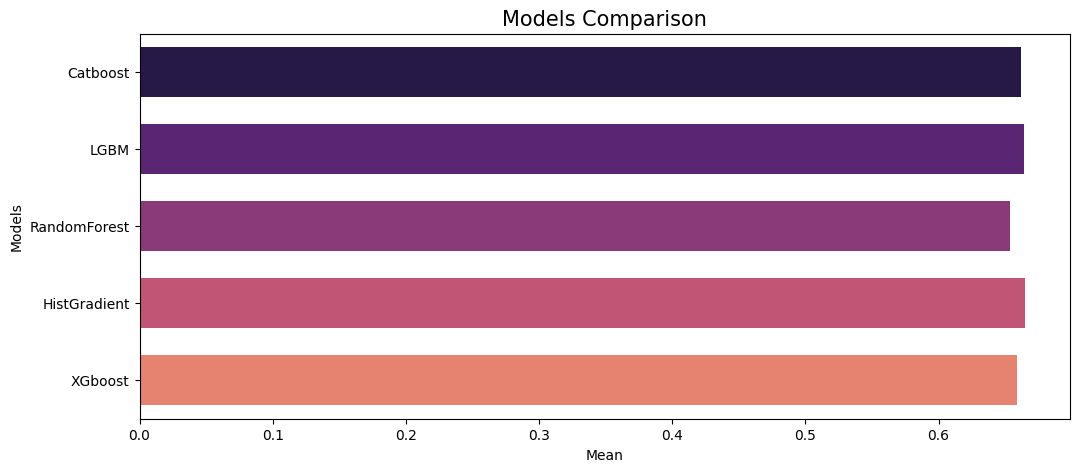

In [ ]:
sns.set_palette('magma')
plt.figure(figsize = (12,5))
sns.barplot(data = models_stats, width = 0.65, x = 'Mean', y = 'Models')
plt.title('Models Comparison', fontsize = 15)
plt.show()

### Final Model

In [ ]:
rf.fit(X_transformed, y)
predictions_rf = rf.predict(X_transformed)

hgb.fit(X_transformed, y)
predictions_hgb = hgb.predict(X_transformed)

lb.fit(X_transformed, y)
predictions_lb = lb.predict(X_transformed)

xb.fit(X_transformed, y)
predictions_xb = xb.predict(X_transformed)

ct.fit(X_transformed, y)
predictions_ct = ct.predict(X_transformed)

print('RandomForest AUC score --->', roc_auc_score(y, predictions_rf))
print('HistGradientBoosting AUC score --->', roc_auc_score(y, predictions_hgb))
print('LGBM AUC score --->', roc_auc_score(y, predictions_lb))
print('XGBOOST AUC score --->', roc_auc_score(y, predictions_xb))
print('Catboost AUC score --->', roc_auc_score(y, predictions_ct))

RandomForest AUC score ---> 0.9996684645771419
HistGradientBoosting AUC score ---> 0.6723131368005911
LGBM AUC score ---> 0.6751014116616216
XGBOOST AUC score ---> 0.6999052879185528
Catboost AUC score ---> 0.6936020399329951


In [ ]:
estimators = [('xb', xb), ('ct', ct)]

In [ ]:
voting = VotingClassifier(estimators = estimators, voting = 'soft')

In [ ]:
voting.fit(X_transformed, y)
predictions_voting = voting.predict(X_transformed)
roc_auc_score(y, predictions_voting)

0.6981571139958582

## Submission
---

In [ ]:
df_test.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [ ]:
test = df_test.drop(columns = 'n', axis =1)

In [ ]:
# test_transformed = qt2.fit_transform(test)
test_transformed = scaler.fit_transform(test)
test_transformed = pd.DataFrame(test_transformed, columns = test.columns, index = test.index)

In [ ]:
X_transformed.shape, test_transformed.shape

((101763, 20), (67842, 20))

In [ ]:
predictions_xb = xb.predict_proba(test_transformed)[:, 1]
predictions_xb

array([0.15445904, 0.16709384, 0.71918285, ..., 0.13856167, 0.11854073,
       0.75873685], dtype=float32)

In [ ]:
predictions_ct = ct.predict_proba(test_transformed)[:, 1]
predictions_ct

array([0.24299628, 0.22532332, 0.65626991, ..., 0.19399007, 0.09812889,
       0.70852466])

In [ ]:
predictions_rf = rf.predict_proba(test_transformed)[:, 1]
predictions_rf

array([0.21, 0.12, 0.55, ..., 0.16, 0.13, 0.72])

In [ ]:
predictions_hgb = hgb.predict_proba(test_transformed)[:, 1]
predictions_hgb

array([0.27445763, 0.17485794, 0.62938792, ..., 0.21024998, 0.1009441 ,
       0.83220993])

In [ ]:
predictions_lb = lb.predict_proba(test_transformed)[:, 1]
predictions_lb

array([0.2764421 , 0.1737357 , 0.6684243 , ..., 0.12270896, 0.1011625 ,
       0.7570118 ])

In [ ]:
predictions_vt = voting.predict_proba(test_transformed)[:, 1]
predictions_vt

array([0.19872766, 0.19620858, 0.68772638, ..., 0.16627587, 0.10833481,
       0.73363075])

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv', index_col= 'id')
sub

,defects
id,
101763,0.5
101764,0.5
101765,0.5
101766,0.5
101767,0.5
...,...
169600,0.5
169601,0.5
169602,0.5


In [ ]:
sub['defects'] = predictions_vt
sub

,defects
id,
101763,0.198728
101764,0.196209
101765,0.687726
101766,0.356988
101767,0.122807
...,...
169600,0.249341
169601,0.111279
169602,0.166276


In [ ]:
sub.to_csv('voting.csv')

In [ ]:
sub['defects'] = predictions_ct
sub

,defects
id,
101763,0.242996
101764,0.225323
101765,0.656270
101766,0.444129
101767,0.146169
...,...
169600,0.263607
169601,0.123988
169602,0.193990


In [ ]:
sub.to_csv('catboost.csv')

### Stacking Models

In [ ]:
combined_predictions = (predictions_lb + predictions_ct + predictions_xb ) / 3
combined_predictions

array([0.22463248, 0.18871762, 0.68129235, ..., 0.15175356, 0.10594404,
       0.74142444])

In [ ]:
sub['defects'] = combined_predictions
sub

,defects
id,
101763,0.224632
101764,0.188718
101765,0.681292
101766,0.390607
101767,0.120321
...,...
169600,0.254709
169601,0.115668
169602,0.151754


In [ ]:
sub.to_csv('combined_predictions4_0.csv')